In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

-This Notebooks refines the model further and takes into account my target audiance. I am predicting house prices for the average home buyer in King County.
 The average house price is 5400,000 dollars and I will be removing all rows that fall outside of 2 standard diviation of that number. 

In [33]:
df_house = pd.read_csv('kc_house_data.csv')


In [6]:
# Average house price
df_house['price'].mean()

540088.1417665294

In [35]:
df_house.date = df_house.date.astype(np.int64)

In [18]:
#remove outliers outside of 2 standard diviations
z_scores_price = stats. zscore(df_house.price)
abs_z_scores_price = np.abs(z_scores_price)
filtered_entries_price = (abs_z_scores_price < 2)
df_house_2std_price = df_house[filtered_entries_price]

In [22]:
df_house_2std_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,1400630400000000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [37]:
df_house_2std_price.price.mean()

487529.024939817

In [45]:
#unique bedrooms

3     9666
4     6469
2     2744
5     1392
6      238
1      199
7       32
0       12
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
#Droping Bedroom outliers, house with 33, 11 ,10 ,9, 8 , and 0 bedrooms 

df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 33 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 11 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 10 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 9 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 8 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 0 ].index, inplace=True)

In [80]:
df_house_2std_price.bedrooms.value_counts()

3    9666
4    6469
2    2744
5    1392
6     238
1     199
7      32
Name: bedrooms, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa0827d4e0>,
      dtype=object)

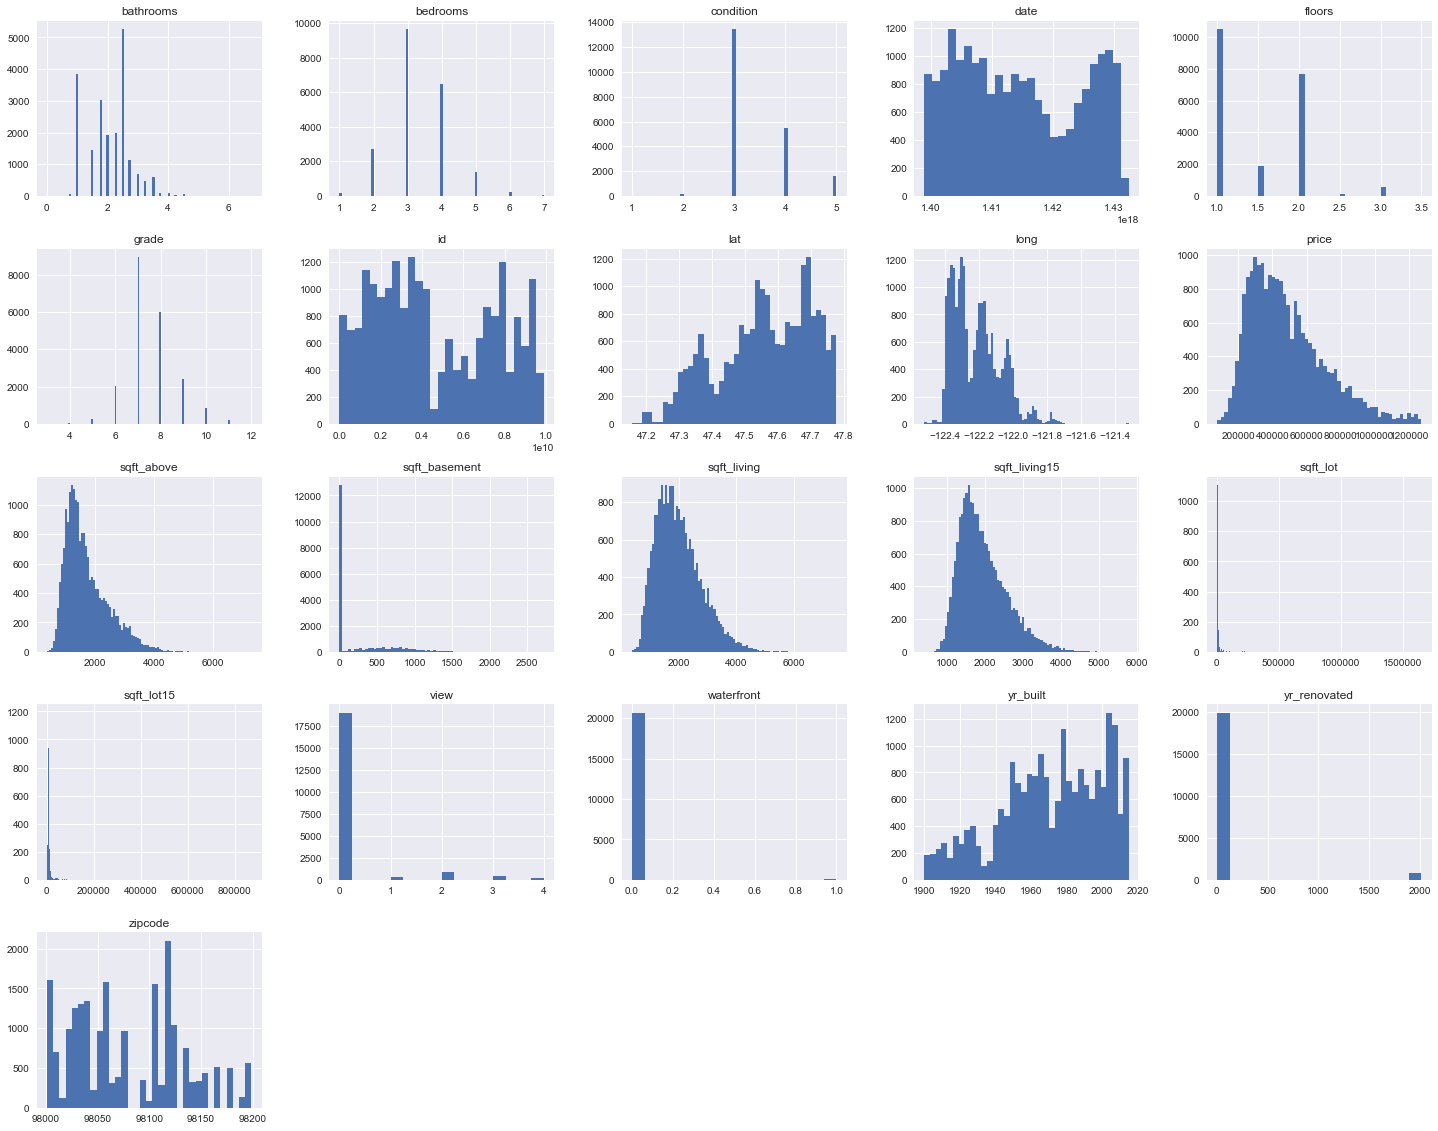

In [68]:
df_house_2std_price.hist(figsize=(25,20), bins='auto')

In [67]:
#houses within this price range do not have waterfront views and generally were not renovated
df_house_2std_price.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.002766,0.001529,0.007969,0.018728,0.000960,-0.133716,0.026283,0.003613,0.020573,...,0.025266,0.002928,-0.003409,0.024372,-0.018488,-0.004841,0.000892,0.020000,0.006770,-0.142748
date,0.002766,1.000000,-0.011393,-0.015358,-0.037553,-0.039345,0.001682,-0.021773,-0.004275,0.001277,...,-0.046443,-0.032326,-0.017678,-0.004589,-0.022035,0.003967,-0.034001,-0.009156,-0.035530,-0.000892
price,0.001529,-0.011393,1.000000,0.311686,0.469975,0.639841,0.092601,0.277917,0.069364,0.269297,...,0.649226,0.546450,0.250238,0.062044,0.092052,-0.023456,0.415188,0.065978,0.580447,0.082931
bedrooms,0.007969,-0.015358,0.311686,1.000000,0.510786,0.603366,0.029788,0.166079,-0.036643,0.047100,...,0.345059,0.485145,0.290118,0.173385,0.003944,-0.157354,-0.029573,0.149039,0.394347,0.027249
bathrooms,0.018728,-0.037553,0.469975,0.510786,1.000000,0.723443,0.069631,0.504122,-0.003828,0.109009,...,0.625232,0.646825,0.230904,0.541410,0.027971,-0.206904,-0.001771,0.248101,0.537828,0.070020
sqft_living,0.000960,-0.039345,0.639841,0.603366,0.723443,1.000000,0.162848,0.344164,0.002526,0.187260,...,0.719541,0.857731,0.384467,0.352056,0.023672,-0.203927,0.020745,0.283360,0.744942,0.175679
sqft_lot,-0.133716,0.001682,0.092601,0.029788,0.069631,0.162848,1.000000,-0.015553,0.024241,0.073104,...,0.097150,0.167583,0.012504,0.044625,0.010463,-0.130257,-0.093265,0.224322,0.143275,0.710867
floors,0.026283,-0.021773,0.277917,0.166079,0.504122,0.344164,-0.015553,1.000000,-0.000872,-0.007433,...,0.457879,0.528891,-0.287307,0.507061,0.000196,-0.063839,0.039494,0.133963,0.270709,-0.019934
waterfront,0.003613,-0.004275,0.069364,-0.036643,-0.003828,0.002526,0.024241,-0.000872,1.000000,0.306402,...,-0.008723,-0.005830,0.015331,-0.041775,0.077372,0.045996,-0.042101,-0.058529,0.010653,0.031644
view,0.020573,0.001277,0.269297,0.047100,0.109009,0.187260,0.073104,-0.007433,0.306402,1.000000,...,0.152871,0.081371,0.214295,-0.065382,0.075849,0.098552,-0.020567,-0.076004,0.205401,0.070695


In [76]:
neededCols_2std_price = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'sqft_living15', 'sqft_lot15']

regression_data_2std_price = df_house_2std_price[neededCols_2std_price]

In [115]:
#regression model with price and beedroom outliers removed

X = regression_data_2std_price.drop(['price'], axis=1)
y = regression_data_2std_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = sm.OLS(y_train, X_train)
model_2std_price = lm.fit()
model_2std_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          1.620e+04
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                        14:42:46   Log-Likelihood:                     -2.2134e+05
No. Observations:               16592   AIC:                                  4.427e+05
Df Residuals:                   16580   BIC:                                  4.428e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -1.13e+04   1735.667     -6.511      0.000   -1.47e+04   -7899.471
bathrooms     -1.826e+04   2662.135     -6.859      0.000   -2.35e+04    -1.3e+04
sqft_living      61.0312      2.099     29.082      0.000      56.918      65.145
sqft_lot          0.1212      0.044      2.769      0.006       0.035       0.207
floors         3.788e+04   3058.035     12.387      0.000    3.19e+04    4.39e+04
view           3.753e+04   1847.544     20.315      0.000    3.39e+04    4.12e+04
condition       4.86e+04   1865.122     26.056      0.000    4.49e+04    5.23e+04
grade           8.93e+04   1824.221     48.952      0.000    8.57e+04    9.29e+04
sqft_above        2.4882      2.004      1.242      0.214      -1.440       6.417
sqft_basement    58.5430      2.297     25.488      0.000      54.041      63.045
yr_built       -297.4967      6.876    -43.267      0.000    -310.974    -284.019
sqft_living15    54.9511      3.052     18.006      0.000      48.969      60.933
sqft_lot15       -0.3744      0.064     -5.810      0.000      -0.501      -0.248
==============================================================================
Omnibus:                     1113.132   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1613.232
Skew:                           0.571   Prob(JB):                         0.00
Kurtosis:                       4.015   Cond. No.                     2.63e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.68e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [120]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_2std_price.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_2std_price.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_2std_price.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_2std_price.predict(X_test))))
print('Cross Validation Train Set:', cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('Cross Validation Test Set:', cross_val_score(model, X_test, y_test, cv = 10, scoring = 'r2').mean())

MSE for train set: 150451.61004742092
MSE for test set: 153020.44414043013
MSE difference: -2568.834093009209
Cross Validation Train Set: 0.6010755563177417
Cross Validation Test Set: 0.6078282493687135


In [114]:
df_house_2std_price.to_csv('Housing_Outliers_removed.csv')